## Plotting Spherical harmonics

Based on code at https://scipython.com/blog/visualizing-the-real-forms-of-the-spherical-harmonics/

learning
* Python - scripting multiple plots
* plotting - advanced plotting, labeling, many plots as a figure

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm

In [2]:
def plot_Y(ax, el, m):
    """Plot the spherical harmonic of degree el and order m on Axes ax."""
    Y = sph_harm(abs(m), el, phi, theta)

    # Linear combination of Y_l,m and Y_l,-m to create the real form.
    if m < 0:
        Y = np.sqrt(2) * (-1)**m * Y.imag
    elif m > 0:
        Y = np.sqrt(2) * (-1)**m * Y.real
    Yx, Yy, Yz = np.abs(Y) * xyz

    # Colour the plotted surface according to the sign of Y.
    cmap = plt.cm.ScalarMappable(cmap=plt.get_cmap('PRGn'))
    cmap.set_clim(-0.5, 0.5)

    ax.plot_surface(Yx, Yy, Yz,
                    facecolors=cmap.to_rgba(Y.real),
                    rstride=2, cstride=2)

    # Draw a set of x, y, z axes for reference.
    ax_lim = 0.5
    ax.plot([-ax_lim, ax_lim], [0,0], [0,0], c='0.5', lw=1, zorder=10)
    ax.plot([0,0], [-ax_lim, ax_lim], [0,0], c='0.5', lw=1, zorder=10)
    ax.plot([0,0], [0,0], [-ax_lim, ax_lim], c='0.5', lw=1, zorder=10)
    # Set the Axes limits and title, turn off the Axes frame.
    ax.set_title('Y_{{{},{}}}'.format(el, m))
    ax_lim = 0.5
    ax.set_xlim(-ax_lim, ax_lim)
    ax.set_ylim(-ax_lim, ax_lim)
    ax.set_zlim(-ax_lim, ax_lim)
    ax.axis('off')


In [3]:
# Grids of polar and azimuthal angles
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2*np.pi, 100)
# Create a 2-D meshgrid of (theta, phi) angles.
theta, phi = np.meshgrid(theta, phi)
# Calculate the Cartesian coordinates of each point in the mesh.
xyz = np.array([np.sin(theta) * np.sin(phi),
                np.sin(theta) * np.cos(phi),
                np.cos(theta)])

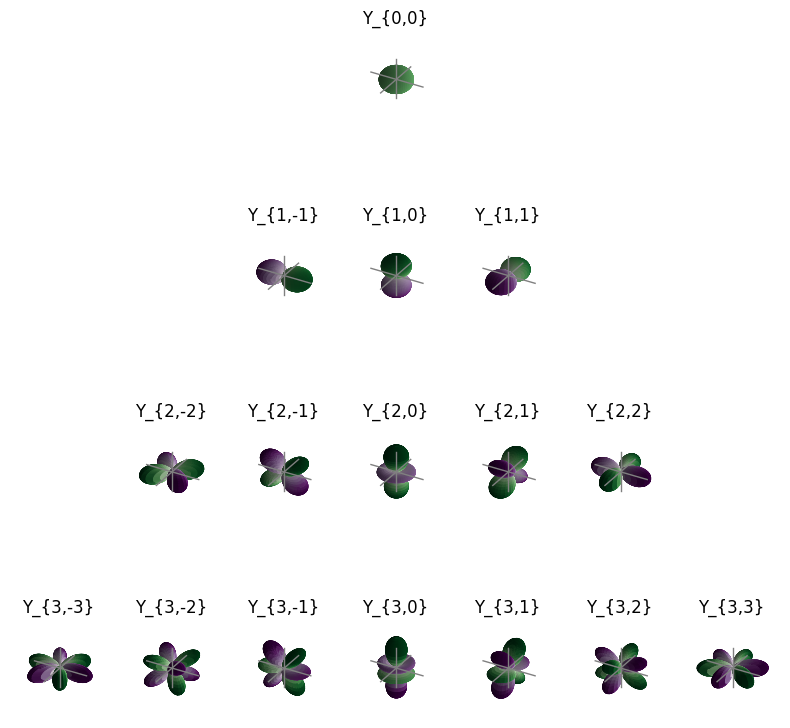

In [5]:
# plot a family of spherical harmonics 
el_max = 3
figsize_px, DPI = 800, 100
figsize_in = figsize_px / DPI
fig = plt.figure(figsize=(figsize_in, figsize_in), dpi=DPI)
spec = gridspec.GridSpec(ncols=2*el_max+1, nrows=el_max+1, figure=fig)
for el in range(el_max+1):
    for m_el in range(-el, el+1):
        ax = fig.add_subplot(spec[el, m_el+el_max], projection='3d')
        plot_Y(ax, el, m_el)
plt.tight_layout()
plt.show()